In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [3]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [3]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] # how does loc work Vs iloc
cat = pd.concat([cat, cat_from_num], axis=1)

num = num.drop(columns=cat_from_num.columns)

In [5]:
crosstab_result=pd.crosstab(df["category"], df["isBestSeller"])
crosstab_result.sort_values(by= True, ascending= False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


We can see that the 5 categories more prevalent in the isBestSeller column are Grocery, Health and Personal Care, Baby, Sports & Outdoors and Power & Hand Tools.

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [7]:
from scipy.stats import chi2_contingency

In [8]:
chi2_stats, chi2_pvalue, _, _= chi2_contingency(crosstab_result)
chi2_pvalue

0.0

The p value is 0.0 therefore we can conclude that there is a direct association bettween this 2 categorical variables.

In [9]:
from scipy.stats.contingency import association

In [10]:
association(crosstab_result, method="cramer")

0.1222829439760564

Even though p value is 0.0 and shows a big association between the 2 variables, with the cramer test we can see that is a weak association.

In [11]:
crosstab_result_bestseller_top10= crosstab_result.sort_values(by=True, ascending= False)
crosstab_result_bestseller_top10=crosstab_result_bestseller_top10.head(10)
crosstab_result_bestseller_top10

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


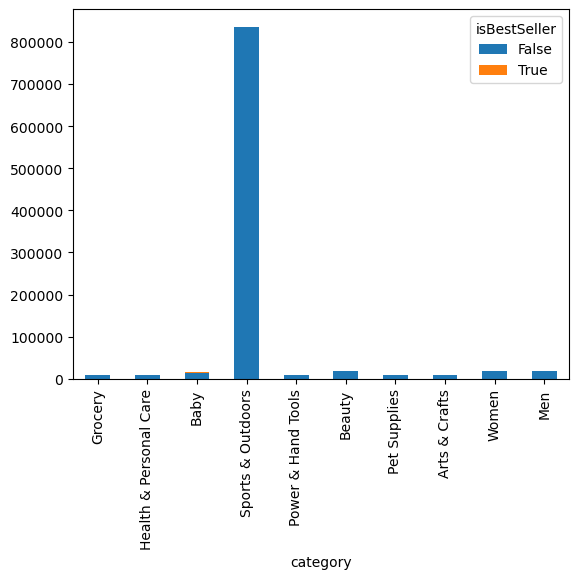

In [12]:
crosstab_result_bestseller_top10.plot(kind="bar", stacked= True)
plt.show()

With this visualization we can see that the most sold categories are not necessarilly the best sellers. As we can see none of the categories presented are best sellers, so the number of products in this categories that are not best sellers are way higher than the ones that are.

In [13]:
crosstab_result_bestseller= crosstab_result.sort_values(by="category", ascending= False)
crosstab_result_bestseller=crosstab_result_bestseller.head(10)
crosstab_result_bestseller

isBestSeller,False,True
category,,
eBook Readers & Accessories,246,0
Women's Sports & Outdoor Shoes,1939,20
Women,17559,213
Window Treatments,234,5
Wind Instruments,243,7
Wearable Technology,8876,30
"Water Coolers, Filters & Cartridges",186,1
Vases,250,0
Vacuums & Floorcare,6919,26


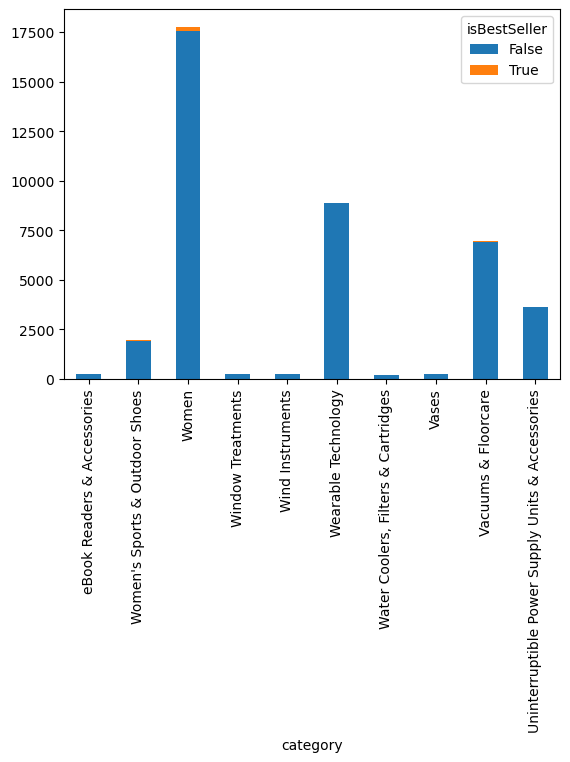

In [14]:
crosstab_result_bestseller.plot(kind="bar", stacked= True)
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [ ]:
#how to eliminate outliers

In [4]:
data= df["price"]
df_outliers_out= df[(df["price"]> data.quantile(0.25)) & (df["price"] < data.quantile(0.75))]
df_outliers_out

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443635,2828576,B0BHQZBSJD,Roucerlin 4 Pcs Soft Motorcycle Motorbike Shif...,3.5,2,14.49,False,0,Motorbike Clothing
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443645,2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing


In [ ]:
#so te faltou passar para index porque series nºao funciona assim

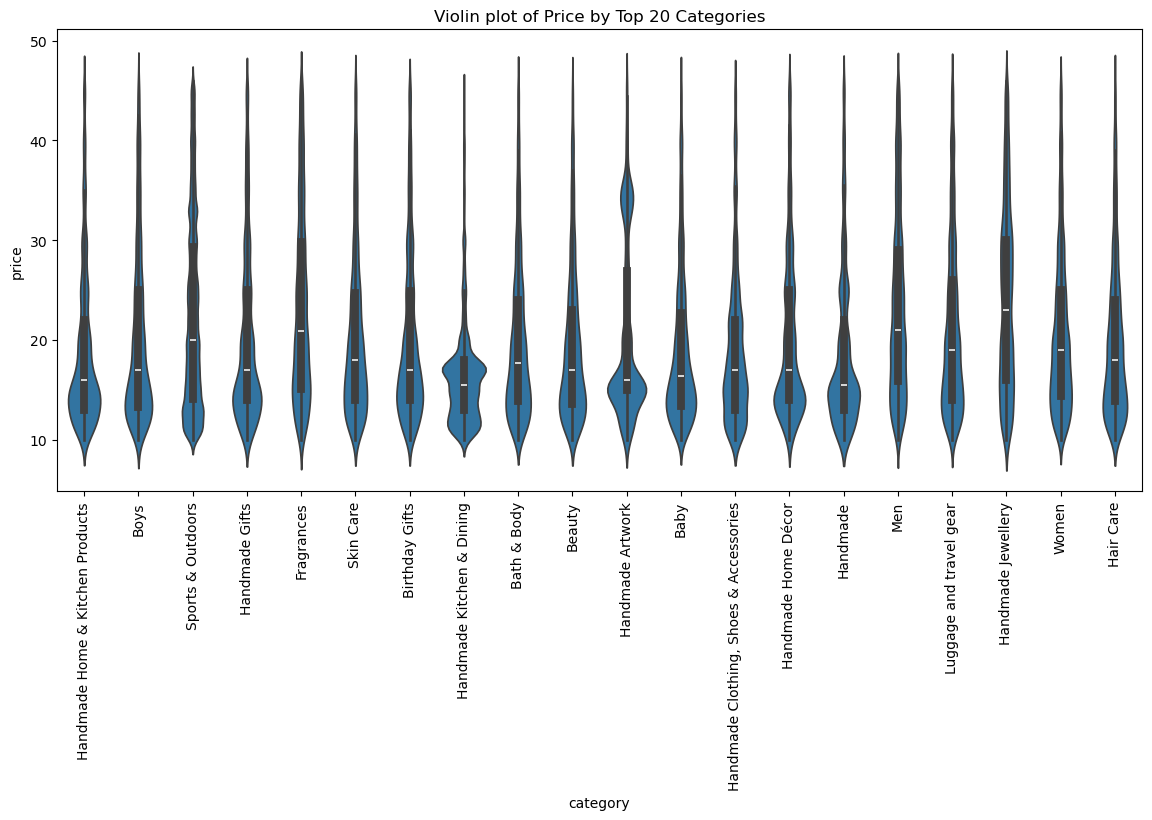

In [16]:
top_categories = df_outliers_out['category'].value_counts().head(20).index
df_top_categories = df_outliers_out[df_outliers_out['category'].isin(top_categories)]

plt.figure(figsize=(14, 6))
plt.title('Violin plot of Price by Top 20 Categories')
sns.violinplot(data=df_top_categories, x="category", y="price")
plt.xticks(rotation=90)
plt.show()


By looking at the violin plot we can conclude that the category with the bigger median price is Handmade Jewellery

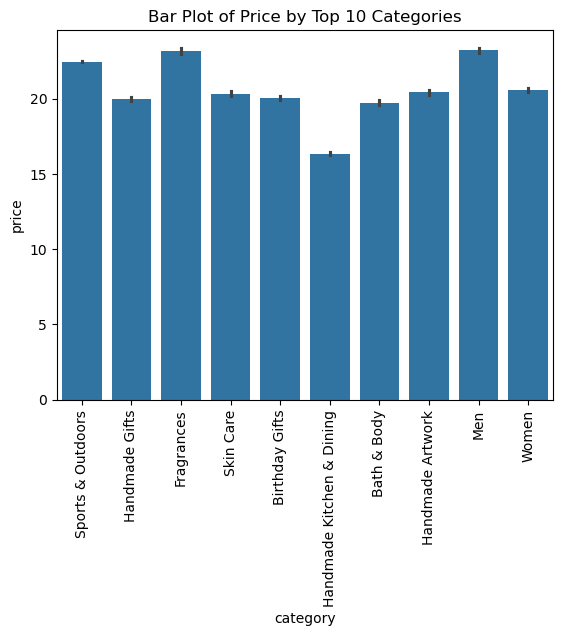

In [19]:
top_categories_10 = df_outliers_out['category'].value_counts().head(10).index
df_top_categories_10 = df_outliers_out[df_outliers_out['category'].isin(top_categories_10)]

sns.barplot(x= "category", y="price", data= df_top_categories_10)
plt.title('Bar Plot of Price by Top 10 Categories')
plt.xticks(rotation=90)
plt.show()

In this bar plot with top 10 categories the ones with the highest average price are men and fragances

Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization. Which category tends to receive the highest median rating from customers? 

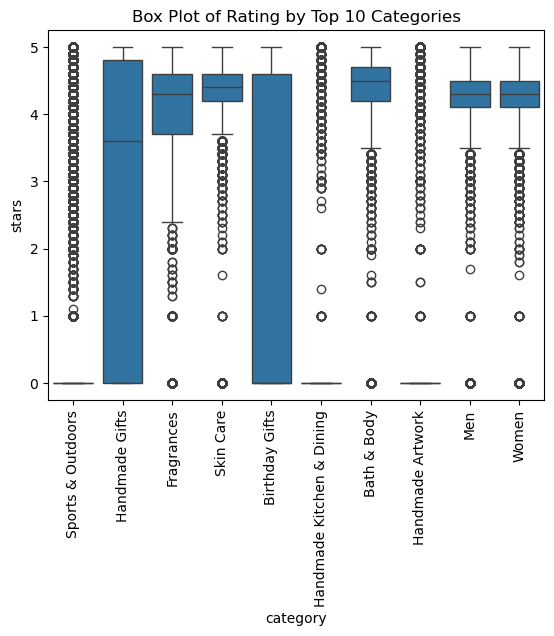

In [20]:
top_categories_10 = df_outliers_out['category'].value_counts().head(10).index
df_top_categories_10 = df_outliers_out[df_outliers_out['category'].isin(top_categories_10)]

sns.boxplot(x= "category", y="stars", data= df_top_categories_10)
plt.title('Box Plot of Rating by Top 10 Categories')
plt.xticks(rotation=90)
plt.show()

By analyzing this boxplot we can conclude that the category that tends to receive the highest median rating from customers is Bath and Body. The ratings stand between 4 and 5 stars, followed by Skin care

Part 3: Investigating the Interplay Between Product Prices and Ratings

Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

In [21]:
df_outliers_out["stars"].corr(df_outliers_out["price"], method="pearson")

-0.009751052770674725

With pearsons correlation of -0.009 we can conclude that this association is very weak and negative.

In [22]:
df_outliers_out["stars"].corr(df_outliers_out["price"], method="spearman")

0.0021531259742720936

Looking at the spearmn correlation we can also conclude that is a weak association. However since the spearman correlation is positive and the perasons is negative, we can say that this correlation is monotonic and not linear, although a very weak monotonic correlation

In [23]:
cat_outliers_out= df_outliers_out.select_dtypes(exclude="number")
num_outliers_out = df_outliers_out.select_dtypes(include="number")

In [24]:
correlation_matrix= num_outliers_out.corr()
correlation_matrix

,uid,stars,reviews,price,boughtInLastMonth
uid,1.000000,0.029954,0.020570,0.015040,0.009293
stars,0.029954,1.000000,0.087205,-0.009751,0.099137
reviews,0.020570,0.087205,1.000000,-0.001658,0.107880
price,0.015040,-0.009751,-0.001658,1.000000,-0.029059
boughtInLastMonth,0.009293,0.099137,0.107880,-0.029059,1.000000


After analyzing both pearsons and spearman correlations we can conclude that there is no direct association between ratings and price. There is a very weak monotonic correlation between these 2 variables. 

In [ ]:
!pip install seaborn --upgrade
!pip install matplotlib --upgrade

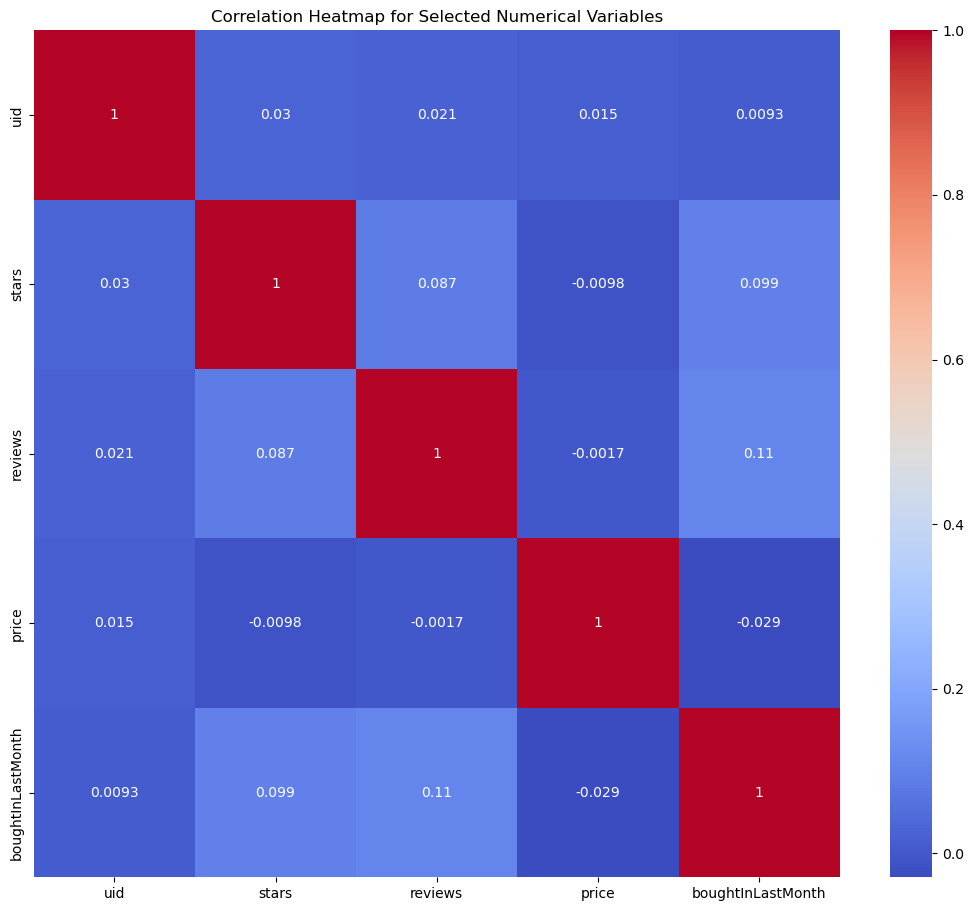

In [26]:
plt.figure(figsize=(13, 11))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

By looking at this heatmap we can see the highest correlations are the reviews and the boughtInLastMonth, which can indicate that the these 2 variables are associated.

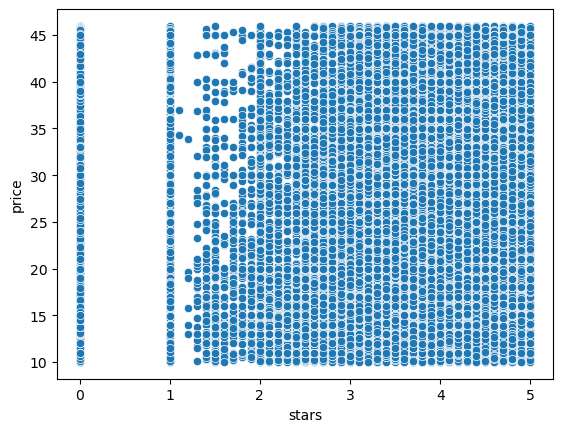

In [28]:
sns.scatterplot(data=df_outliers_out, x='stars', y='price')
plt.show()

By looking at this scatterplot we can see that most of the ratings are between 3 and 5 starst however there is a patter of 0 stars which can indicate that people did not rate the products

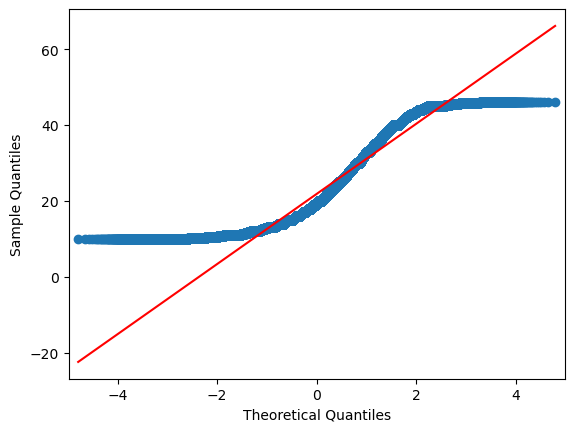

In [6]:
import statsmodels.api as sm
sm.qqplot(df_outliers_out['price'], line='s');
plt.show()

By looking at this plot we can conclude that it does not follow a normal distribution, it has an upper tails that shows that  the data points deviate significantly from the red line, suggesting a long tail or skewness to the right. This indicates that there are more extreme high values inproduct pricee than would be expected in a normal distribution
nSo we can conclude that ied. It appears to be right-sk end and has heavier tails than a normal distributWe can use nce, a log transformation could be considered to address the skewness and make the data more normally distributed.